In [1]:
import time
from sklearn import datasets, model_selection, metrics, decomposition, svm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lfw_data = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)

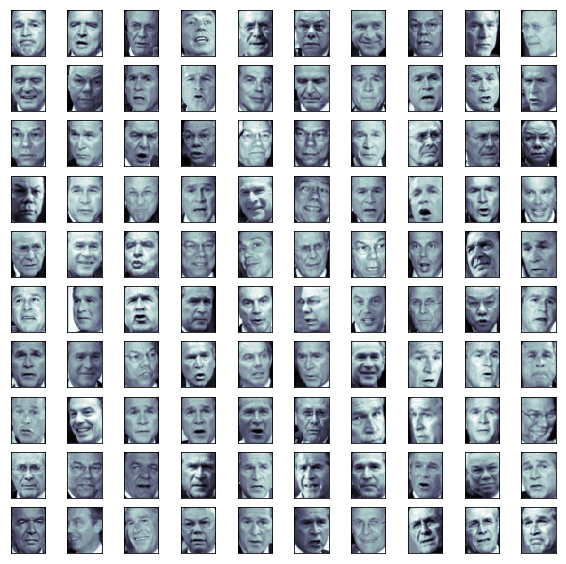

In [3]:
fig = plt.figure(figsize=(10, 10))

for i in range(100) :
    ax = fig.add_subplot(10, 10, i + 1, xticks = [], yticks = [])
    ax.imshow(lfw_data.images[i], cmap = plt.cm.bone)

plt.show()

In [4]:
new_x, new_y = np.zeros((500, 37*50)), np.zeros(500)
k = 0
count = [0, 0, 0, 0, 0]

for i in range(lfw_data.data.shape[0]) :
    if count[lfw_data.target[i]] < 100 :
        
        new_x[k] = lfw_data.data[i]
        new_y[k] = lfw_data.target[i]
        k = k + 1
#        new_y.append(lfw_data.target)
        count[lfw_data.target[i]] = count[lfw_data.target[i]] + 1

#new_x.shape, new_y

In [24]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(lfw_data.data, lfw_data.target)

#x_train, x_test, y_train, y_test = model_selection.train_test_split(new_x, new_y)

In [25]:
pca = decomposition.PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
k, total = 0, 0

while total < 0.95 :
    total = total + pca.explained_variance_ratio_[k]
    k = k + 1

k    

129

In [27]:
pca = decomposition.PCA(n_components=k, whiten=True)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [28]:
x_train_pca.shape, x_test_pca.shape

((855, 129), (285, 129))

In [29]:
svc = svm.SVC(kernel='linear')
svc.fit(x_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
y_test_pred = svc.predict(x_test_pca)
metrics.confusion_matrix(y_test, y_test_pred)
print(metrics.classification_report(y_test, y_test_pred))
#y_test_pred

             precision    recall  f1-score   support

          0       0.68      0.82      0.74        60
          1       0.83      0.85      0.84        34
          2       0.88      0.80      0.84       124
          3       0.90      0.90      0.90        29
          4       0.73      0.71      0.72        38

avg / total       0.82      0.81      0.81       285

